Nama : Ilham Fikriansyah

Email : 1703162



Deskripsi

data yang digunakan adalah data dari https://www.kaggle.com/hassanamin/atis-airlinetravelinformationsystem 

In [82]:
import pandas as pd
df = pd.read_csv('/content/sample_data/atis_intents.csv', names=['label', 'sentence'])
pd.set_option('display.max_rows', 10)

In [83]:
df

,label,sentence
0,atis_flight,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...
...,...,...
4973,atis_airfare,what is the airfare for flights from denver t...
4974,atis_flight,do you have any flights from denver to baltim...
4975,atis_airline,which airlines fly into and out of denver
4976,atis_flight,does continental fly from boston to san franc...


In [84]:
print(df['label'].unique())
print(len(df['label'].unique()))

['atis_flight' 'atis_flight_time' 'atis_airfare' 'atis_aircraft'
 'atis_ground_service' 'atis_airport' 'atis_airline' 'atis_distance'
 'atis_abbreviation' 'atis_ground_fare' 'atis_quantity' 'atis_city'
 'atis_flight_no' 'atis_capacity' 'atis_flight#atis_airfare' 'atis_meal'
 'atis_restriction' 'atis_airline#atis_flight_no'
 'atis_ground_service#atis_ground_fare' 'atis_airfare#atis_flight_time'
 'atis_cheapest' 'atis_aircraft#atis_flight#atis_flight_no']
22


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     4978 non-null   object
 1   sentence  4978 non-null   object
dtypes: object(2)
memory usage: 77.9+ KB


In [86]:
category = pd.get_dummies(df.label)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='label')
df_baru.head()

,sentence,atis_abbreviation,atis_aircraft,atis_aircraft#atis_flight#atis_flight_no,atis_airfare,atis_airfare#atis_flight_time,atis_airline,atis_airline#atis_flight_no,atis_airport,atis_capacity,atis_cheapest,atis_city,atis_distance,atis_flight,atis_flight#atis_airfare,atis_flight_no,atis_flight_time,atis_ground_fare,atis_ground_service,atis_ground_service#atis_ground_fare,atis_meal,atis_quantity,atis_restriction
0,i want to fly from boston at 838 am and arriv...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,what flights are available from pittsburgh to...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,what is the arrival time in san francisco for...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,cheapest airfare from tacoma to orlando,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,round trip fares from pittsburgh to philadelp...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
sentence = df_baru['sentence'].values
label = df_baru[['atis_flight','atis_flight_time','atis_airfare','atis_aircraft','atis_ground_service','atis_airport','atis_airline','atis_distance','atis_abbreviation','atis_ground_fare','atis_quantity','atis_city','atis_flight_no','atis_capacity','atis_flight#atis_airfare','atis_meal','atis_restriction','atis_airline#atis_flight_no','atis_ground_service#atis_ground_fare','atis_airfare#atis_flight_time','atis_cheapest','atis_aircraft#atis_flight#atis_flight_no']].values

In [88]:
from sklearn.model_selection import train_test_split
sentence_latih, sentence_test, label_latih, label_test = train_test_split(sentence, label, test_size=0.2)

In [89]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sentence_latih) 
tokenizer.fit_on_texts(sentence_test)
 
sekuens_latih = tokenizer.texts_to_sequences(sentence_latih)
sekuens_test = tokenizer.texts_to_sequences(sentence_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [90]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(22, activation='softmax'),
    tf.keras.layers.Dropout(rate=0.01)
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [91]:
import keras as tfs
# define the checkpoint
checkpoint_filepath="/content/sample_data/rps-{epoch:02d}-{accuracy:.4f}-{val_accuracy:.4f}.hdf5"
model_checkpoint_callback = tfs.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [92]:
num_epochs = 10
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[model_checkpoint_callback])

Epoch 1/10
125/125 - 6s - loss: 1.5508 - accuracy: 0.7240 - val_loss: 1.0770 - val_accuracy: 0.7390
Epoch 2/10
125/125 - 3s - loss: 1.0454 - accuracy: 0.7454 - val_loss: 0.6972 - val_accuracy: 0.7902
Epoch 3/10
125/125 - 3s - loss: 0.7295 - accuracy: 0.8127 - val_loss: 0.5669 - val_accuracy: 0.8624
Epoch 4/10
125/125 - 3s - loss: 0.5601 - accuracy: 0.8754 - val_loss: 0.4019 - val_accuracy: 0.8976
Epoch 5/10
125/125 - 3s - loss: 0.4664 - accuracy: 0.9008 - val_loss: 0.3318 - val_accuracy: 0.9076
Epoch 6/10
125/125 - 3s - loss: 0.4309 - accuracy: 0.9144 - val_loss: 0.3068 - val_accuracy: 0.9177
Epoch 7/10
125/125 - 3s - loss: 0.3890 - accuracy: 0.9262 - val_loss: 0.2623 - val_accuracy: 0.9277
Epoch 8/10
125/125 - 3s - loss: 0.3275 - accuracy: 0.9312 - val_loss: 0.2873 - val_accuracy: 0.9147
Epoch 9/10
125/125 - 3s - loss: 0.3382 - accuracy: 0.9417 - val_loss: 0.2388 - val_accuracy: 0.9438
Epoch 10/10
125/125 - 3s - loss: 0.2612 - accuracy: 0.9533 - val_loss: 0.2344 - val_accuracy: 0.9408

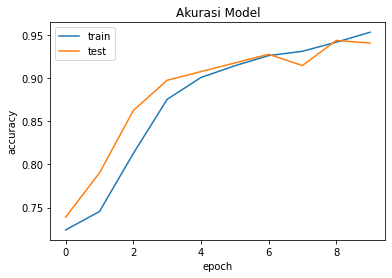

In [94]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

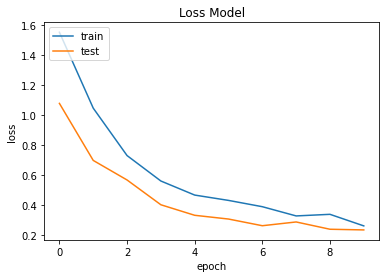

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
from tensorflow.keras.models import load_model

# load model
model = load_model('/content/sample_data/rps-09-0.9417-0.9438.hdf5')

In [100]:
print(tokenizer.texts_to_sequences(['Elon musk is good guy , he owns spacex, tesla.']))

[[1, 1, 21, 1, 1, 1, 1, 1, 1]]


In [105]:
model.predict([2,3])

array([[0.17843814, 0.16260952, 0.1257146 , 0.02984713, 0.0113762 ,
        0.03228777, 0.1765651 , 0.03312072, 0.02321811, 0.00559207,
        0.01993027, 0.02265608, 0.04858971, 0.01350076, 0.04895829,
        0.02972922, 0.00567664, 0.0121454 , 0.00197398, 0.00673576,
        0.00265315, 0.00868141],
       [0.10404089, 0.15727498, 0.20194994, 0.03676838, 0.01119073,
        0.02447125, 0.09880649, 0.04713961, 0.03010442, 0.00960379,
        0.03249157, 0.03129665, 0.05594238, 0.01739848, 0.05534958,
        0.03259577, 0.00838211, 0.01633846, 0.0040123 , 0.00938553,
        0.00467001, 0.01078679]], dtype=float32)